In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import  zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
missing_value=['?','N/a',np.nan]

In [72]:
df1=pd.read_csv('Switzerland.csv',header=None,na_values=missing_value)
df2=pd.read_csv('Cleavland.csv',header=None,na_values=missing_value)
df3=pd.read_csv('hung.csv',header=None,na_values=missing_value)
df=pd.concat([df1,df2,df3])


In [73]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeack','slope','ca','thal','num']

In [74]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35.0,1.0,4.0,NaN,0.0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36.0,1.0,4.0,110.0,0.0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38.0,0.0,4.0,105.0,0.0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52.0,1.0,4.0,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54.0,0.0,3.0,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56.0,1.0,4.0,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58.0,0.0,2.0,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


In [75]:
df.duplicated().sum()

1

In [76]:
df.shape

(720, 14)

In [77]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35.0,1.0,4.0,NaN,0.0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36.0,1.0,4.0,110.0,0.0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38.0,0.0,4.0,105.0,0.0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52.0,1.0,4.0,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54.0,0.0,3.0,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56.0,1.0,4.0,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58.0,0.0,2.0,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


## dataCleaning

In [78]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeack      6
slope       207
ca          413
thal        320
num           0
dtype: int64

In [79]:
def clean(data):
    for col in data:
        df[col].fillna(df[col].mean(), inplace=True)
        
clean(df)        

In [80]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeack    0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [81]:
from scipy.stats import zscore

# Calculate Z-score for each column
z_scores = df.apply(zscore)

# Define threshold for outlier detection
threshold = 3  # You can adjust this threshold based on your requirement

# Identify outliers based on threshold
outliers_df = df[(z_scores > threshold) | (z_scores < -threshold)]

# Delete outliers for each column
cleaned_df = df[~((z_scores > threshold) | (z_scores < -threshold)).any(axis=1)]


In [82]:
df.shape

(720, 14)

In [83]:
df=cleaned_df

In [84]:
df.shape

(620, 14)

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,num
0,32.0,1.0,1.0,95.000000,0.0,0.10989,0.000000,127.0,0.0,0.700000,1.000000,0.680782,4.985,1
1,34.0,1.0,4.0,115.000000,0.0,0.10989,0.568245,154.0,0.0,0.200000,1.000000,0.680782,4.985,1
2,35.0,1.0,4.0,131.804742,0.0,0.10989,0.000000,130.0,1.0,0.789636,1.701754,0.680782,7.000,3
3,36.0,1.0,4.0,110.000000,0.0,0.10989,0.000000,125.0,1.0,1.000000,2.000000,0.680782,6.000,1
4,38.0,0.0,4.0,105.000000,0.0,0.10989,0.000000,166.0,0.0,2.800000,1.000000,0.680782,4.985,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,52.0,1.0,4.0,140.000000,266.0,0.00000,0.000000,134.0,1.0,2.000000,2.000000,0.680782,4.985,1
289,52.0,1.0,4.0,160.000000,331.0,0.00000,0.000000,94.0,1.0,2.500000,1.701754,0.680782,4.985,1
290,54.0,0.0,3.0,130.000000,294.0,0.00000,1.000000,100.0,1.0,0.000000,2.000000,0.680782,4.985,1
292,58.0,0.0,2.0,180.000000,393.0,0.00000,0.000000,110.0,1.0,1.000000,2.000000,0.680782,7.000,1


In [85]:
df2=df

In [1]:
# heatmap
# import matplotlib.pyplot as plt
# import seaborn as sns
# # Compute correlations between features and target
# correlations = df.corr()['CLASS'].drop('CLASS')

# # Print correlations
# print("Correlation with the Target:")
# print(correlations)
# print()

# # Plot correlation heatmap
# plt.figure(figsize=(15, 20))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

## histogram

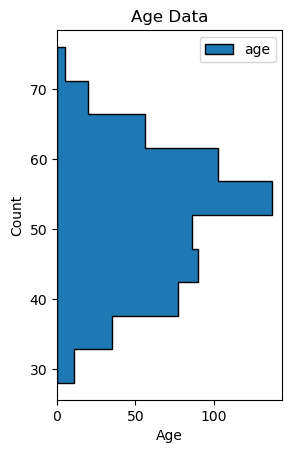

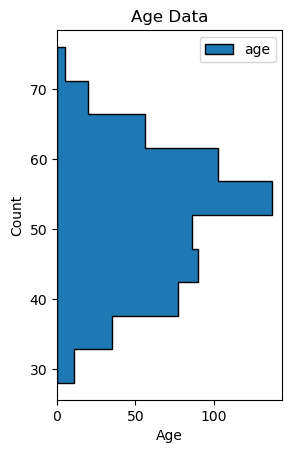

In [51]:

# Now you can use plt.title() function as usual
plt.subplot(1,2,1)
plt.hist(df['age'], edgecolor='black',label='age',orientation="horizontal", histtype='stepfilled')
plt.title('Age Data')
plt.xlabel("Age")
plt.legend()
plt.ylabel("Count")
plt.show()

# Now you can use plt.title() function as usual
plt.subplot(1,2,2)
plt.hist(df['age'], edgecolor='black',label='age',orientation="horizontal", histtype='stepfilled')
plt.title('Age Data')
plt.xlabel("Age")
plt.legend()
plt.ylabel("Count")

plt.show()



<Axes: xlabel='age', ylabel='Count'>

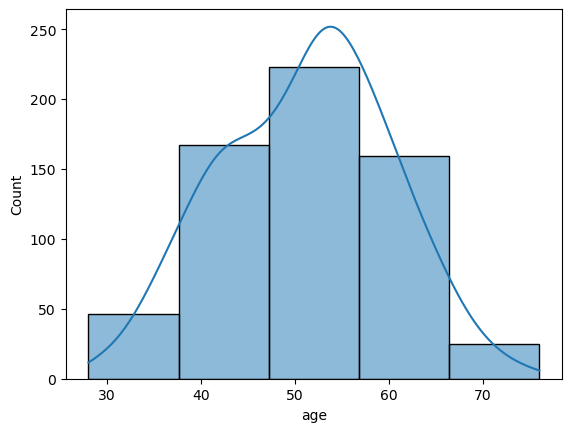

In [37]:
sns.histplot(data=df, x='age', kde=True, bins=5)

## PieChart

In [108]:
df=df.head();

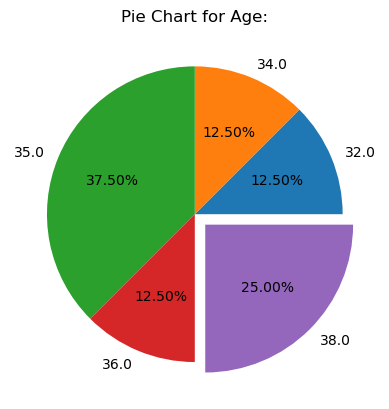

In [109]:
import matplotlib.pyplot as plt

# Select specific value for num and age
num_value = df['num']
age_label = df['age']
ex=[0,0,0,0,0.1]
# Create a pie chart using the selected value
plt.pie(num_value, labels=age_label, explode=ex,autopct='%0.2f%%')
plt.title('Pie Chart for Age:')
plt.show()


### ScatterPlot

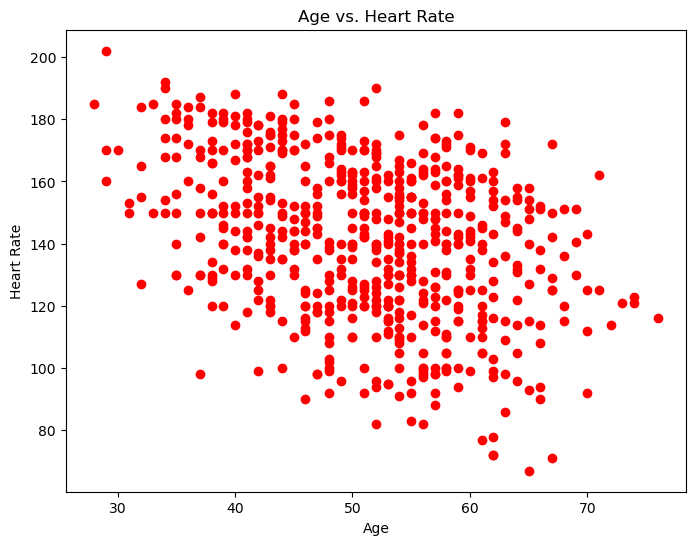

In [110]:
plt.figure(figsize=(8, 6))
x=df2['age'];
y=df2['thalach']
#sns.scatterplot(x='age', y='thalach', data=df, hue='num')
plt.scatter(x,y,c='red')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Age vs. Heart Rate')  
plt.show()
#here we have to give number of color = each column member count

## BarPlot

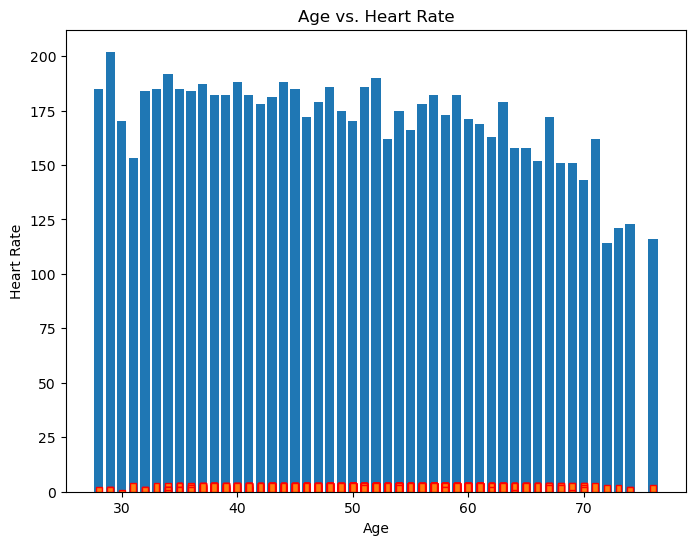

In [137]:
plt.figure(figsize=(8, 6))#sex cp fbs rest, exa slope thal ca categorial
x=df2['age'];
y=df2['thalach']
z=df2['cp']
plt.bar(x,y)
plt.bar(x,z,edgecolor='red',width=0.5)
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Age vs. Heart Rate')  
plt.show()

## Linecharts

In [130]:
df3=df.head();

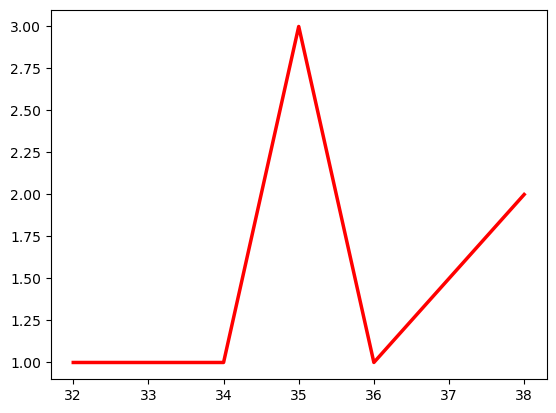

In [131]:
x=df3['age'];
y=df3['num']
plt.plot(x,y,linewidth=2.5,c='r');
plt.show()

<Axes: xlabel='age', ylabel='num'>

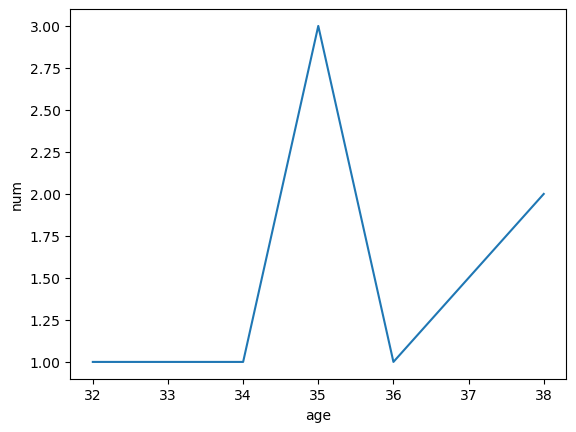

In [132]:
sns.lineplot(x=x, y=y)


## BoxPlot

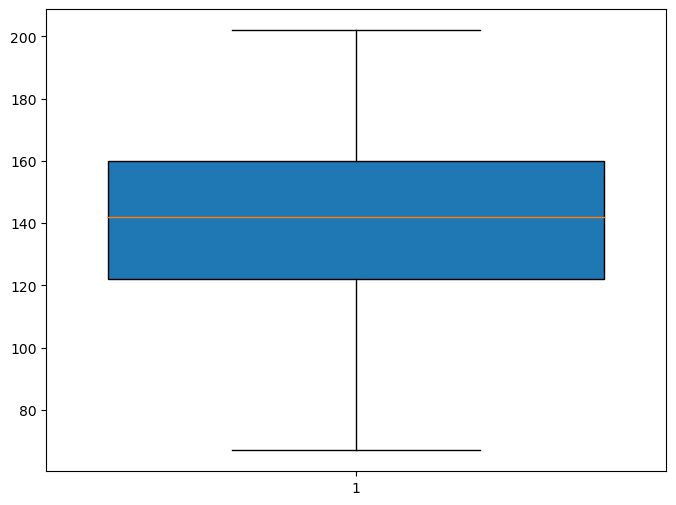

In [133]:
plt.figure(figsize=(8, 6))
z=df2['thalach']

plt.boxplot(z,widths=0.8,patch_artist=True)
plt.show()

<Axes: xlabel='age', ylabel='num'>

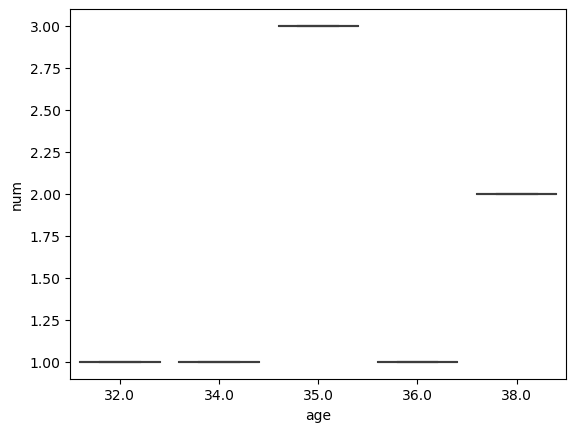

In [134]:
sns.boxplot(x=df3['age'], y=df3['num'])

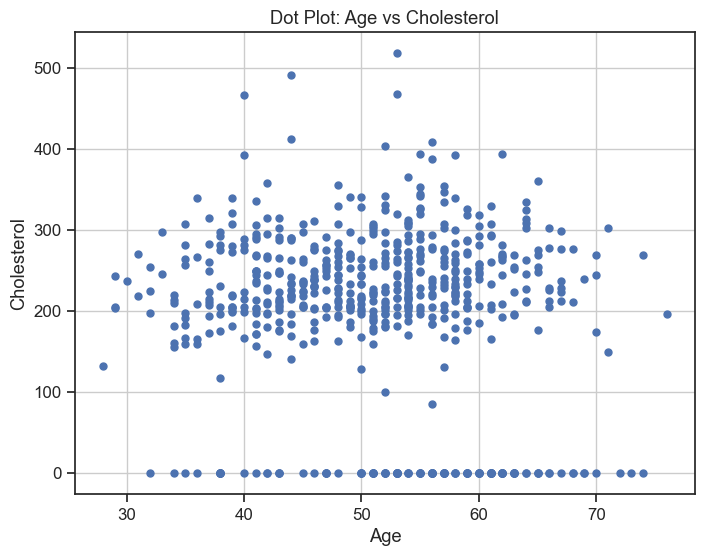

In [153]:
plt.figure(figsize=(8, 6))
plt.plot(df2['age'], df2['chol'], 'o', markersize=5)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Dot Plot: Age vs Cholesterol')
plt.grid(True)
plt.show()


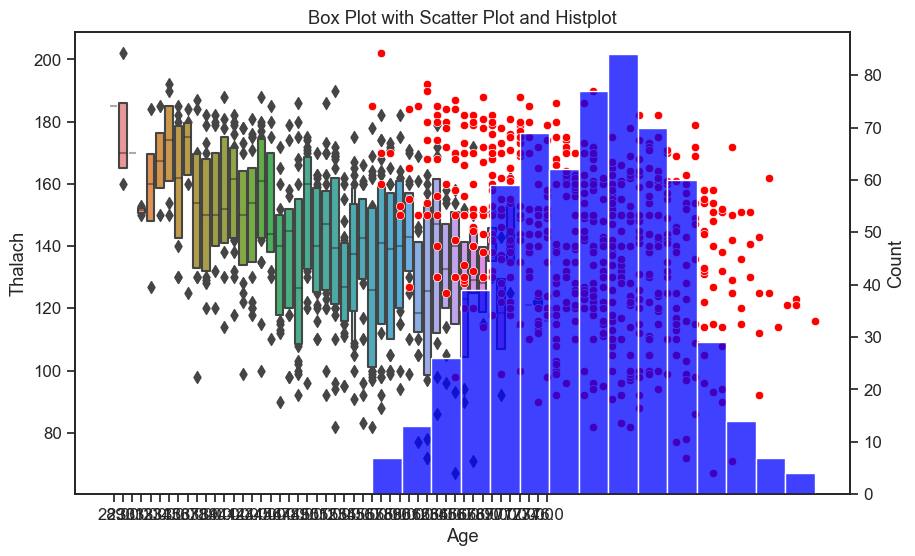

In [150]:
# Set the style, palette, and font scale
sns.set(style='ticks', palette='deep', font_scale=1.1)

# Create a box plot with scatter plot and histplot inside
fig, ax = plt.subplots(figsize=(10, 6))

# Box plot with scatter plot inside
sns.boxenplot(x='age', y='thalach', data=df2, ax=ax)

# Add scatter plot
sns.scatterplot(x='age', y='thalach', data=df2, color='red', ax=ax)

# Add histogram on top
sns.histplot(df2['age'], color='blue', ax=ax.twinx())

# Set title and labels
ax.set_title('Box Plot with Scatter Plot and Histplot')
ax.set_xlabel('Age')
ax.set_ylabel('Thalach')

plt.show()

## box plot in the scatter

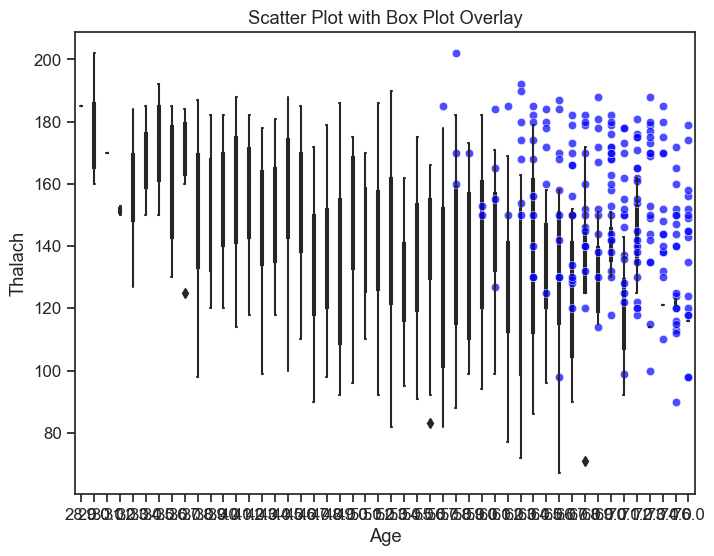

In [148]:
sns.set(style='ticks', palette='deep', font_scale=1.1)

# Create subplots for scatter plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot scatter plot
sns.scatterplot(x='age', y='thalach', data=df2, color='blue', alpha=0.7, ax=ax)

# Overlay box plots on the scatter plot
sns.boxplot(x='age', y='thalach', data=df2, color='green', width=0.15, ax=ax)

# Set title and labels
ax.set_title('Scatter Plot with Box Plot Overlay')
ax.set_xlabel('Age')
ax.set_ylabel('Thalach')

plt.show()